# 4.7 계단 오르내리기 예제

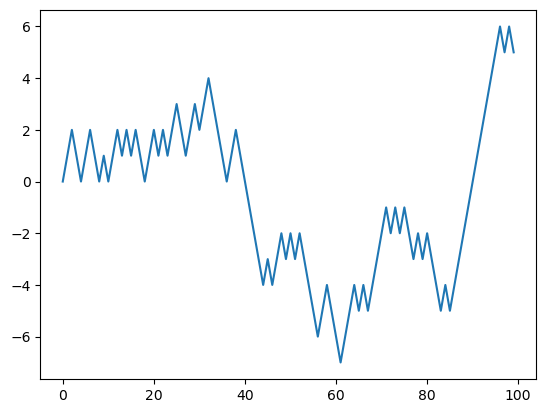

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import random
position = 0
walk = [position]
nsteps = 1000

for _ in range(nsteps):
    step = 1 if random.randint(0,1) else -1 # 무작위 값이 0이면 step = 1, 1이면 step = 0
    position += step
    walk.append(position)

# 처음 100회 동안 계단 오르내리기 현황(누적 합)
plt.plot(walk[:100])

draws :  [1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1]
steps :  [-1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1 -1 -1]
walk :  [-1  0 -1  0  1  0 -1 -2 -3 -2 -3 -2 -3 -4 -3 -2 -1 -2 -3 -4]


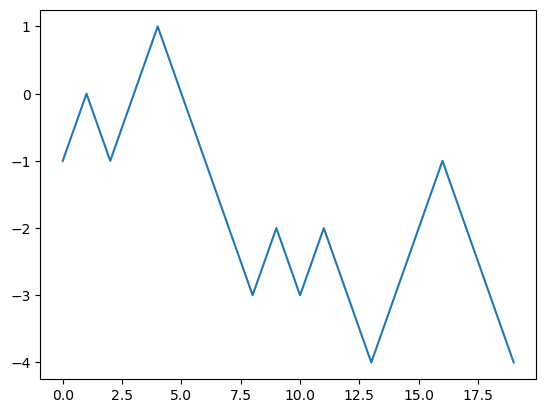

In [58]:
# numpy.random 모듈을 이용하여 한 번에 20번 수행한 결과를 저장하고 누적 합 계산

nsteps = 20

rng = np.random.default_rng(seed = 12345) # 새로운 난수 생성기

draws = rng.integers(0, 2, size = nsteps) # 0(포함)과 2(제외) 사이의 (nsteps-1) 개의 임의 정수 배열 생성

steps = np.where(draws == 0, 1, -1) # 임의 정수 배열이 0일 경우 1, 아니면 -1인 배열 steps(원소가 1이거나 -1)

walk = steps.cumsum() # steps의 누적 합


print("draws : ",draws)
print("steps : ",steps)
print("walk : ",walk)
plt.plot(walk)

In [46]:
walk.min()

-4

In [47]:
walk.max()

1

In [48]:
print(np.abs(walk) >= 3) # 누적합의 절댓값이 3 이상인 값은 true, 아니면 false를 반환하는 boolean 배열

[False False False False False False False False  True False  True False
  True  True  True False False False  True  True]


In [49]:
(np.abs(walk) >= 3).argmax() # boolean 배열에서 최댓값의 1번째 index 반환(여기서 최댓값은 true)

8

## 4.7.1 한 번에 많이 시뮬레이션 하기

계단 오르내리기 횟수를 5000회 정도로 해야 할 경우

numpy.random 함수에 크기가 2인 튜플을 넘기면 2차원 배열이 생성되고 각 열에서 누적 합을 구해서 5000회의 시뮬레이션을 한 번에 처리 가능

In [50]:
nwalks = 5000
nsteps = 1000

draws2 = rng.integers(0,2, size = (nwalks, nsteps)) # 0이상 2미만의 5000 x 1000 형태의 임의의 2차원 정수 배열 생성(원소가 0이거나 1)

steps2 = np.where(draws2 > 0, 1, -1) # draws2 의 원소가 1인 경우 1, 0이면 -1인 정수배열 steps

walks2 = steps2.cumsum(axis = 1) # 열의 누적 합(4-4.BasedOn_Array.ipynb 참고(행의 합, 열의 합))
walks2

array([[  1,   0,   1, ..., -40, -41, -42],
       [ -1,   0,  -1, ...,   8,   7,   6],
       [  1,   0,   1, ..., -44, -43, -42],
       ...,
       [  1,   0,  -1, ...,  50,  49,  48],
       [ -1,  -2,  -3, ...,  -4,  -5,  -4],
       [ -1,   0,   1, ...,   8,   7,   8]])

In [51]:
walks2.max()

110

In [52]:
walks2.min()

-111

In [53]:
hits30 = (np.abs(walks2) >= 30).any(axis = 1)

In [54]:
hits30

array([ True, False,  True, ...,  True,  True, False])

In [55]:
hits30.sum()

3422

In [56]:
crossing_times = ((np.abs(walks2[hits30])>= 30).argmax(axis = 1))
crossing_times

array([599, 243, 465, ..., 849, 183, 249], dtype=int64)

In [57]:
crossing_times.mean()

505.19403857393337